## Pre-Processing and Data Cleaning

### Part A GDP Data 

In [2]:
import pandas as pd

# === Load GDP Data ===
gdp_df = pd.read_csv("all_gdp_data.csv")


In [3]:
gdp_df

,GeoFips,GeoName,LineCode,Description,Time,GDP,State,YearQuarter
0,1000,Alabama,1,All industry total,2005:Q1,195673.0,alabama_gdp_quarterly.csv,2005 Q1
1,1000,Alabama,1,All industry total,2005:Q2,197495.8,alabama_gdp_quarterly.csv,2005 Q2
2,1000,Alabama,1,All industry total,2005:Q3,196798.5,alabama_gdp_quarterly.csv,2005 Q3
3,1000,Alabama,1,All industry total,2005:Q4,199018.6,alabama_gdp_quarterly.csv,2005 Q4
4,1000,Alabama,1,All industry total,2006:Q1,199142.9,alabama_gdp_quarterly.csv,2006 Q1
...,...,...,...,...,...,...,...,...
3945,56000,Wyoming,1,All industry total,2023:Q3,40799.4,wyoming,2023 Q3
3946,56000,Wyoming,1,All industry total,2023:Q4,40824.8,wyoming,2023 Q4
3947,56000,Wyoming,1,All industry total,2024:Q1,40070.0,wyoming,2024 Q1
3948,56000,Wyoming,1,All industry total,2024:Q2,40414.4,wyoming,2024 Q2


In [4]:
gdp_df["State"] = gdp_df["GeoName"].str.lower().str.strip()
gdp_df.drop(columns=[ "GeoName"], inplace=True)


In [5]:
gdp_df["State"].unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'florida', 'georgia',
       'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode island', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming'],
      dtype=object)

In [6]:

# Sort and compute GDP growth per state
gdp_df = gdp_df.sort_values(by=["State", "YearQuarter"])
gdp_df["gdp_growth"] = gdp_df.groupby("State")["GDP"].pct_change()


gdp_df.groupby("State"): groups the data so we can do time-series operations within each state separately.

["GDP"].pct_change(): computes the percentage change from one row to the next in the GDP column (i.e., 

✅ What you get:
A new column gdp_growth with quarterly GDP growth rates for each state.

The first quarter for each state will be NaN (no previous value to compare).



In [7]:
gdp_df

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
0,1000,1,All industry total,2005:Q1,195673.0,alabama,2005 Q1,NaN
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
...,...,...,...,...,...,...,...,...
3945,56000,1,All industry total,2023:Q3,40799.4,wyoming,2023 Q3,0.017969
3946,56000,1,All industry total,2023:Q4,40824.8,wyoming,2023 Q4,0.000623
3947,56000,1,All industry total,2024:Q1,40070.0,wyoming,2024 Q1,-0.018489
3948,56000,1,All industry total,2024:Q2,40414.4,wyoming,2024 Q2,0.008595


### Part B - Employment Data

In [8]:
# === Load Employment Data ===
employment_df = pd.read_csv("employment_panel.csv")



In [9]:
employment_df

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State,Date
0,1976,Jan,57.1,53.3,1486509,1387606,98903,6.7,alabama,1976-01-01
1,1976,Feb,56.9,53.2,1485944,1387267,98677,6.6,alabama,1976-02-01
2,1976,Mar,56.8,53.1,1486172,1388303,97869,6.6,alabama,1976-03-01
3,1976,Apr,56.8,53.1,1488773,1392012,96761,6.5,alabama,1976-04-01
4,1976,May,56.8,53.2,1492486,1396244,96242,6.4,alabama,1976-05-01
...,...,...,...,...,...,...,...,...,...,...
24144,2024,Sep,66.0,64.0,3182957,3087095,95862,3.0,wisconsin,2024-09-01
24145,2024,Oct,66.0,64.0,3185395,3087565,97830,3.1,wisconsin,2024-10-01
24146,2024,Nov,66.0,63.9,3185724,3087089,98635,3.1,wisconsin,2024-11-01
24147,2024,Dec,65.9,63.9,3185399,3086732,98667,3.1,wisconsin,2024-12-01


In [10]:
# Clean + Normalize State names
employment_df["State"] = employment_df["State"].str.lower().str.strip()


In [11]:
# Ensure employment is numeric
employment_df["employment"] = pd.to_numeric(employment_df["employment"], errors="coerce")

In [12]:
# Sort chronologically within state
employment_df = employment_df.sort_values(by=["State", "Date"])

# Compute monthly employment growth
employment_df["employment_growth"] = employment_df.groupby("State")["employment"].pct_change()

In [13]:
employment_df

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State,Date,employment_growth
0,1976,Jan,57.1,53.3,1486509,1387606,98903,6.7,alabama,1976-01-01,NaN
1,1976,Feb,56.9,53.2,1485944,1387267,98677,6.6,alabama,1976-02-01,-0.000244
2,1976,Mar,56.8,53.1,1486172,1388303,97869,6.6,alabama,1976-03-01,0.000747
3,1976,Apr,56.8,53.1,1488773,1392012,96761,6.5,alabama,1976-04-01,0.002672
4,1976,May,56.8,53.2,1492486,1396244,96242,6.4,alabama,1976-05-01,0.003040
...,...,...,...,...,...,...,...,...,...,...,...
24144,2024,Sep,66.0,64.0,3182957,3087095,95862,3.0,wisconsin,2024-09-01,0.000430
24145,2024,Oct,66.0,64.0,3185395,3087565,97830,3.1,wisconsin,2024-10-01,0.000152
24146,2024,Nov,66.0,63.9,3185724,3087089,98635,3.1,wisconsin,2024-11-01,-0.000154
24147,2024,Dec,65.9,63.9,3185399,3086732,98667,3.1,wisconsin,2024-12-01,-0.000116


In [ ]:
# Optional: Filter both datasets to start from 2005 Q2
# gdp_growth_df = gdp_growth_df[gdp_growth_df["YearQuarter"] >= "2005 Q2"]
#uarterly_employment_growth = quarterly_employment_growth[quarterly_employment_growth["YearQuarter"] >= "2005 Q2"]


In [14]:
employment_df["Date"] = pd.to_datetime(employment_df["Date"])
employment_df["YearQuarter"] = (
    employment_df["Date"]
    .dt.to_period("Q")       # Converts to a quarterly period like 2005Q2 (as a Period object)
    .astype(str)             # Converts it to a string: '2005Q2'
    .str.replace("Q", " Q")  # Turns '2005Q2' → '2005 Q2' to match GDP format
)


In [15]:
employment_df

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State,Date,employment_growth,YearQuarter
0,1976,Jan,57.1,53.3,1486509,1387606,98903,6.7,alabama,1976-01-01,NaN,1976 Q1
1,1976,Feb,56.9,53.2,1485944,1387267,98677,6.6,alabama,1976-02-01,-0.000244,1976 Q1
2,1976,Mar,56.8,53.1,1486172,1388303,97869,6.6,alabama,1976-03-01,0.000747,1976 Q1
3,1976,Apr,56.8,53.1,1488773,1392012,96761,6.5,alabama,1976-04-01,0.002672,1976 Q2
4,1976,May,56.8,53.2,1492486,1396244,96242,6.4,alabama,1976-05-01,0.003040,1976 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
24144,2024,Sep,66.0,64.0,3182957,3087095,95862,3.0,wisconsin,2024-09-01,0.000430,2024 Q3
24145,2024,Oct,66.0,64.0,3185395,3087565,97830,3.1,wisconsin,2024-10-01,0.000152,2024 Q4
24146,2024,Nov,66.0,63.9,3185724,3087089,98635,3.1,wisconsin,2024-11-01,-0.000154,2024 Q4
24147,2024,Dec,65.9,63.9,3185399,3086732,98667,3.1,wisconsin,2024-12-01,-0.000116,2024 Q4


In [ ]:
# Aggregate monthly to quarterly (mean growth per quarter)
quarterly_employment_growth = (
    employment_df.dropna(subset=["employment_growth"])
    .groupby(["State", "YearQuarter"])["employment_growth"]
    .mean()
    .reset_index()
)




In [17]:
# Part 2: Clean State Names
quarterly_employment_growth["State"] = quarterly_employment_growth["State"].str.lower().str.strip()
gdp_df["State"] = gdp_df["State"].str.lower().str.strip()

#Find Common Units
common_states = set(gdp_df["State"]) & set(quarterly_employment_growth["State"])
common_quarters = set(gdp_df["YearQuarter"]) & set(quarterly_employment_growth["YearQuarter"])

#Filter both datasets to only include common states and quarters
gdp_growth_df = gdp_df[
    gdp_df["State"].isin(common_states) & gdp_df["YearQuarter"].isin(common_quarters)
]

quarterly_employment_growth = quarterly_employment_growth[
    quarterly_employment_growth["State"].isin(common_states) &
    quarterly_employment_growth["YearQuarter"].isin(common_quarters)
]






In [24]:
# === Final Cleaned & Aligned Outputs ===
print(gdp_growth_df.head())


   GeoFips  LineCode         Description     Time       GDP    State  \
0     1000         1  All industry total  2005:Q1  195673.0  alabama   
1     1000         1  All industry total  2005:Q2  197495.8  alabama   
2     1000         1  All industry total  2005:Q3  196798.5  alabama   
3     1000         1  All industry total  2005:Q4  199018.6  alabama   
4     1000         1  All industry total  2006:Q1  199142.9  alabama   

  YearQuarter  gdp_growth  
0     2005 Q1         NaN  
1     2005 Q2    0.009316  
2     2005 Q3   -0.003531  
3     2005 Q4    0.011281  
4     2006 Q1    0.000625  


In [22]:
# === Final Cleaned & Aligned Outputs ===

print(quarterly_employment_growth.head())

       State YearQuarter  employment_growth
116  alabama     2005 Q1           0.001514
117  alabama     2005 Q2           0.002355
118  alabama     2005 Q3           0.001631
119  alabama     2005 Q4           0.000867
120  alabama     2006 Q1           0.001524


In [25]:
gdp_growth_df

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
0,1000,1,All industry total,2005:Q1,195673.0,alabama,2005 Q1,NaN
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
...,...,...,...,...,...,...,...,...
3866,55000,1,All industry total,2023:Q3,346067.0,wisconsin,2023 Q3,0.013137
3867,55000,1,All industry total,2023:Q4,350266.1,wisconsin,2023 Q4,0.012134
3868,55000,1,All industry total,2024:Q1,349300.9,wisconsin,2024 Q1,-0.002756
3869,55000,1,All industry total,2024:Q2,352941.1,wisconsin,2024 Q2,0.010421


In [28]:
gdp_growth_df.to_csv("gdp_growth_data.csv", index=False)
quarterly_employment_growth.to_csv("quarterly_employment_growth_data.csv", index=False)

In [26]:
# === Compute monthly and quarterly employment growth (like before) ===
employment_df["employment"] = pd.to_numeric(employment_df["employment"], errors="coerce")
employment_df["employment_growth"] = employment_df.groupby("State")["employment"].pct_change()
employment_df["Date"] = pd.to_datetime(employment_df["Date"])
employment_df["YearQuarter"] = (
    employment_df["Date"].dt.to_period("Q").astype(str).str.replace("Q", " Q", regex=False)
)

# === Full Quarterly Employment Growth from 1976 ===
full_quarterly_employment_growth = (
    employment_df.dropna(subset=["employment_growth"])
    .groupby(["State", "YearQuarter"])["employment_growth"]
    .mean()
    .reset_index()
)
full_quarterly_employment_growth["State"] = full_quarterly_employment_growth["State"].str.lower().str.strip()

# === Aligned version with GDP (starting 2005) ===
gdp_growth_df["State"] = gdp_growth_df["State"].str.lower().str.strip()
common_states = set(gdp_growth_df["State"]) & set(full_quarterly_employment_growth["State"])
common_quarters = set(gdp_growth_df["YearQuarter"]) & set(full_quarterly_employment_growth["YearQuarter"])

aligned_employment_growth = full_quarterly_employment_growth[
    full_quarterly_employment_growth["State"].isin(common_states) &
    full_quarterly_employment_growth["YearQuarter"].isin(common_quarters)
]

# === Final DataFrames ===
# full_quarterly_employment_growth → from 1976 onward
# aligned_employment_growth → subset aligned with GDP


C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_19004\3576484021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_growth_df["State"] = gdp_growth_df["State"].str.lower().str.strip()


In [29]:
full_quarterly_employment_growth.head()
full_quarterly_employment_growth.to_csv("full_quarterly_employment_growth.csv", index=False)

### Part C Economic Policy Uncertainty Data

In [30]:
# === Load uncertainty data ===
uncertainty_df = pd.read_csv("state_policy_uncertainty_data.csv")
uncertainty_df

,year,month,EPU_NationalAK,EPU_StateAK,EPU_CompositeAK,EPU_NationalAL,EPU_StateAL,EPU_CompositeAL,EPU_NationalCA,EPU_StateCA,...,EPU_CompositeVA,EPU_NationalWA,EPU_StateWA,EPU_CompositeWA,EPU_NationalWI,EPU_StateWI,EPU_CompositeWI,EPU_NationalWV,EPU_StateWV,EPU_CompositeWV
0,2000,1,187.453420,112.472052,187.453420,23.094095,57.735238,80.829333,62.781434,53.812658,...,54.322415,61.505207,41.003471,92.257810,27.633859,18.422573,36.845146,88.797137,192.393796,251.591887
1,2000,2,108.823551,72.549034,108.823551,54.965434,43.972347,87.944694,55.672061,46.393384,...,65.986886,72.640708,72.640708,114.149684,49.047458,29.428475,78.475933,30.111366,30.111366,60.222731
2,2000,3,58.469634,58.469634,58.469634,115.651704,150.347215,196.607896,93.642135,68.854511,...,50.122937,82.204535,31.968430,109.606046,17.901206,35.802411,44.753014,14.177555,28.355110,42.532665
3,2000,4,61.402377,30.701188,92.103565,81.732605,40.866303,95.354706,115.154448,43.182918,...,73.629401,99.323942,54.628168,129.121125,46.132076,27.679246,64.584907,75.176359,30.070544,90.211631
4,2000,5,90.526286,120.701714,181.052572,93.152330,13.307476,93.152330,113.846367,67.765695,...,63.555761,88.733744,23.350985,102.744335,120.546793,9.272830,129.819623,43.286618,43.286618,57.715491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024,8,178.611761,257.994765,257.994765,175.749940,73.999975,175.749940,97.256495,209.101464,...,38.464333,105.328478,126.394174,189.591261,49.632822,82.721370,115.809918,126.139170,126.139170,236.510944
296,2024,9,217.560735,197.782486,237.338984,104.819909,83.855927,146.747873,86.097159,101.751188,...,48.389825,80.104456,104.135793,152.198467,158.235790,66.625596,183.220389,51.925364,86.542274,121.159183
297,2024,10,56.970657,56.970657,75.960876,83.614570,74.324062,83.614570,117.628377,120.242341,...,191.181212,212.517398,191.951198,301.637597,101.007462,38.849024,132.086681,46.951740,62.602321,93.903481
298,2024,11,312.736022,229.339749,354.434158,171.106572,34.221314,179.661901,336.340213,263.853098,...,352.156558,186.973071,121.938960,260.136447,189.303408,32.922332,205.764574,33.360834,66.721669,66.721669


In [32]:
uncertainty_df_long = pd.read_csv("state_policy_uncertainty_long.csv")
uncertainty_df_long

,year,month,EPUType,State,EPU_value
0,2000,1,National,AK,187.453420
1,2000,1,State,AK,112.472052
2,2000,1,Composite,AK,187.453420
3,2000,1,National,AL,23.094095
4,2000,1,State,AL,57.735238
...,...,...,...,...,...
36895,2024,12,State,WI,160.523807
36896,2024,12,Composite,WI,296.969043
36897,2024,12,National,WV,37.875406
36898,2024,12,State,WV,37.875406


In [33]:
# Define state abbreviation to full name mapping
state_abbrev_to_name = {
    "AK": "alaska", "AL": "alabama", "AR": "arkansas", "AZ": "arizona", "CA": "california",
    "CO": "colorado", "CT": "connecticut", "DC": "district of columbia", "DE": "delaware", "FL": "florida",
    "GA": "georgia", "HI": "hawaii", "IA": "iowa", "ID": "idaho", "IL": "illinois",
    "IN": "indiana", "KS": "kansas", "KY": "kentucky", "LA": "louisiana", "MA": "massachusetts",
    "MD": "maryland", "ME": "maine", "MI": "michigan", "MN": "minnesota", "MO": "missouri",
    "MS": "mississippi", "MT": "montana", "NC": "north carolina", "ND": "north dakota", "NE": "nebraska",
    "NH": "new hampshire", "NJ": "new jersey", "NM": "new mexico", "NV": "nevada", "NY": "new york",
    "OH": "ohio", "OK": "oklahoma", "OR": "oregon", "PA": "pennsylvania", "RI": "rhode island",
    "SC": "south carolina", "SD": "south dakota", "TN": "tennessee", "TX": "texas", "UT": "utah",
    "VA": "virginia", "VT": "vermont", "WA": "washington", "WI": "wisconsin", "WV": "west virginia",
    "WY": "wyoming"
}

# Add a new column with full state names
uncertainty_df_long["StateName"] = uncertainty_df_long["State"].map(state_abbrev_to_name)

# Lowercase for consistency
uncertainty_df_long["StateName"] = uncertainty_df_long["StateName"].str.lower()

In [34]:
# Show sample
print(uncertainty_df_long[["State", "StateName"]].drop_duplicates().head())

   State    StateName
0     AK       alaska
3     AL      alabama
6     CA   california
9     CO     colorado
12    CT  connecticut


In [35]:
uncertainty_df_long.rename(columns={"State": "StateCode", "StateName": "State"}, inplace=True)

In [36]:
uncertainty_df_long

,year,month,EPUType,StateCode,EPU_value,State
0,2000,1,National,AK,187.453420,alaska
1,2000,1,State,AK,112.472052,alaska
2,2000,1,Composite,AK,187.453420,alaska
3,2000,1,National,AL,23.094095,alabama
4,2000,1,State,AL,57.735238,alabama
...,...,...,...,...,...,...
36895,2024,12,State,WI,160.523807,wisconsin
36896,2024,12,Composite,WI,296.969043,wisconsin
36897,2024,12,National,WV,37.875406,west virginia
36898,2024,12,State,WV,37.875406,west virginia


In [37]:
uncertainty_df_long.to_csv("uncertainty_data_long.csv", index=False)

In [38]:
# Ensure EPUType column is standardized
uncertainty_df_long["EPUType"] = uncertainty_df_long["EPUType"].str.strip().str.lower()

# 1. Composite EPU DataFrame
epu_composite_df = uncertainty_df_long[uncertainty_df_long["EPUType"] == "composite"].copy()

# 2. State EPU DataFrame
epu_state_df = uncertainty_df_long[uncertainty_df_long["EPUType"] == "state"].copy()

# 3. National EPU DataFrame
epu_national_df = uncertainty_df_long[uncertainty_df_long["EPUType"] == "national"].copy()




In [43]:
 epu_composite_df
epu_composite_df.to_csv("epu_composite_data.csv", index=False)

In [44]:
epu_state_df
epu_state_df.to_csv("epu_state_data.csv", index=False)

In [45]:
epu_national_df
epu_national_df.to_csv("epu_national_data.csv", index=False)

In [46]:
# Common preprocessing step for all
def monthly_to_quarterly(df, value_col, state_col="State"):
    df = df.copy()
    df["YearQuarter"] = (
        pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")
        .dt.to_period("Q")
        .astype(str)
        .str.replace("Q", " Q", regex=False)
    )
    return (
        df.groupby([state_col, "YearQuarter"])[value_col]
        .mean()
        .reset_index()
        .rename(columns={state_col: "State", value_col: value_col + "_Quarterly"})
    )

In [47]:

# Convert each one
epu_composite_quarterly = monthly_to_quarterly(epu_composite_df, "EPU_value")
epu_state_quarterly = monthly_to_quarterly(epu_state_df, "EPU_value")
epu_national_quarterly = monthly_to_quarterly(epu_national_df, "EPU_value")

# Save each as CSV
epu_composite_quarterly.to_csv("epu_composite_quarterly.csv", index=False)
epu_state_quarterly.to_csv("epu_state_quarterly.csv", index=False)
epu_national_quarterly.to_csv("epu_national_quarterly.csv", index=False)

In [48]:
epu_composite_quarterly.head()

,State,YearQuarter,EPU_value_Quarterly
0,alabama,2000 Q1,121.793975
1,alabama,2000 Q2,72.139769
2,alabama,2000 Q3,98.389124
3,alabama,2000 Q4,149.433598
4,alabama,2001 Q1,247.652036


### Part D Financial Stress

In [49]:
financial_stress_df = pd.read_csv("financial_stress_data.csv")
financial_stress_df

,observation_date,STLFSI4
0,1993-12-31,-0.3029
1,1994-01-07,-0.3810
2,1994-01-14,-0.1179
3,1994-01-21,-0.3580
4,1994-01-28,-0.2276
...,...,...
1625,2025-02-21,-0.7603
1626,2025-02-28,-0.4514
1627,2025-03-07,-0.3599
1628,2025-03-14,-0.2259


In [55]:
financial_stress_df["observation_date"]= pd.to_datetime(financial_stress_df["observation_date"])

### Part E Vix Data

In [51]:
vix_df = pd.read_csv("vix_history_data.csv")
vix_df

,DATE,OPEN,HIGH,LOW,CLOSE
0,01/02/1990,17.24,17.24,17.24,17.24
1,01/03/1990,18.19,18.19,18.19,18.19
2,01/04/1990,19.22,19.22,19.22,19.22
3,01/05/1990,20.11,20.11,20.11,20.11
4,01/08/1990,20.26,20.26,20.26,20.26
...,...,...,...,...,...
8889,03/21/2025,20.02,21.14,19.15,19.28
8890,03/24/2025,19.13,19.14,17.46,17.48
8891,03/25/2025,17.58,17.77,17.02,17.15
8892,03/26/2025,17.23,19.07,16.97,18.33


In [53]:
vix_df["DATE"]= pd.to_datetime(vix_df["DATE"])

In [54]:
vix_df

,DATE,OPEN,HIGH,LOW,CLOSE
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26
...,...,...,...,...,...
8889,2025-03-21,20.02,21.14,19.15,19.28
8890,2025-03-24,19.13,19.14,17.46,17.48
8891,2025-03-25,17.58,17.77,17.02,17.15
8892,2025-03-26,17.23,19.07,16.97,18.33


In [56]:
vvix_df = pd.read_csv("vvix_history_data.csv")
vvix_df

,DATE,VVIX
0,03/06/2006,71.73
1,03/15/2006,15.71
2,03/16/2006,27.94
3,03/17/2006,28.60
4,03/20/2006,37.93
...,...,...
4731,03/21/2025,87.99
4732,03/24/2025,81.89
4733,03/25/2025,87.46
4734,03/26/2025,90.24


In [57]:
vvix_df["DATE"]= pd.to_datetime(vvix_df["DATE"])

In [58]:
composite_rate_df = pd.read_csv("composite_rates_data.csv")
composite_rate_df

,month_time,composite_rates,Date,composite_rates_diff
0,Jan-90,7.95,1990-01-01,NaN
1,Feb-90,7.80,1990-02-01,-0.15
2,Mar-90,7.95,1990-03-01,0.15
3,Apr-90,8.14,1990-04-01,0.19
4,May-90,7.77,1990-05-01,-0.37
...,...,...,...,...
417,Oct-24,4.83,2024-10-01,-0.30
418,Nov-24,4.64,2024-11-01,-0.19
419,Dec-24,4.48,2024-12-01,-0.16
420,Jan-25,4.33,2025-01-01,-0.15


In [60]:
bank_df = pd.read_csv("bank-data.csv")
bank_df

,ASSET,ELNATR,ID,LNLSGR,PTXNOINC,STNAME,YEAR
0,628308,1055,SI_2024_AK,252179,5696,Alaska,2024
1,593326,-407,SI_2024_AL,489727,3838,Alabama,2024
2,129013,0,SI_2024_AR,97858,2309,Arkansas,2024
3,110135409,1038825,SI_2024_AZ,45817092,-122711,Arizona,2024
4,35019702,57142,SI_2024_CA,22337908,830412,California,2024
...,...,...,...,...,...,...,...
2168,1338458,1152,SI_1984_VT,1082461,4719,Vermont,1984
2169,17958651,13433,SI_1984_WA,12930310,39309,Washington,1984
2170,14954594,64,SI_1984_WI,10828814,78245,Wisconsin,1984
2171,2210070,0,SI_1984_WV,1532871,596,West Virginia,1984


## Part 2 - Pre Treatment Dynamics

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

In [2]:
gdp_growth_df = pd.read_csv("gdp_growth_data.csv")
employment_growth_df = pd.read_csv("quarterly_employment_growth_data.csv")



In [3]:
# STEP 2: Filter to Pre-treatment Window

start_qtr, end_qtr = "2005 Q2", "2008 Q3"

gdp_pre = gdp_growth_df[
    (gdp_growth_df["YearQuarter"] >= start_qtr) & (gdp_growth_df["YearQuarter"] <= end_qtr)
]

emp_pre = employment_growth_df[
    (employment_growth_df["YearQuarter"] >= start_qtr) & (employment_growth_df["YearQuarter"] <= end_qtr)
]


In [4]:
gdp_pre.head(20)

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
5,1000,1,All industry total,2006:Q2,200031.3,alabama,2006 Q2,0.004461
6,1000,1,All industry total,2006:Q3,199875.0,alabama,2006 Q3,-0.000781
7,1000,1,All industry total,2006:Q4,200646.3,alabama,2006 Q4,0.003859
8,1000,1,All industry total,2007:Q1,199991.2,alabama,2007 Q1,-0.003265
9,1000,1,All industry total,2007:Q2,201622.9,alabama,2007 Q2,0.008159
10,1000,1,All industry total,2007:Q3,203021.2,alabama,2007 Q3,0.006935


In [5]:
# STEP 3: Merge GDP + Employment
panel = pd.merge(gdp_pre, emp_pre, on=["State", "YearQuarter"], how="inner")

In [6]:
panel

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth,employment_growth
0,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316,0.002355
1,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531,0.001631
2,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281,0.000867
3,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625,0.001524
4,1000,1,All industry total,2006:Q2,200031.3,alabama,2006 Q2,0.004461,0.001940
...,...,...,...,...,...,...,...,...,...
415,55000,1,All industry total,2007:Q3,290829.8,wisconsin,2007 Q3,0.004935,0.000146
416,55000,1,All industry total,2007:Q4,290612.7,wisconsin,2007 Q4,-0.000746,0.001023
417,55000,1,All industry total,2008:Q1,288584.9,wisconsin,2008 Q1,-0.006978,0.001108
418,55000,1,All industry total,2008:Q2,289724.5,wisconsin,2008 Q2,0.003949,-0.000566


In [7]:
# STEP 4: Run VAR(1) Per State

var_features = {}

for state in panel["State"].unique():
    try:
        df_state = panel[panel["State"] == state][["YearQuarter", "gdp_growth", "employment_growth"]].copy()
        df_state = df_state.sort_values("YearQuarter")

        # Fix format before creating PeriodIndex
        df_state["YearQuarter"] = df_state["YearQuarter"].str.replace(" Q", "Q", regex=False)
        df_state["YearQuarter"] = pd.PeriodIndex(df_state["YearQuarter"], freq="Q")
        df_state.set_index("YearQuarter", inplace=True)

        if len(df_state) < 9:
            continue

        model = VAR(df_state)
        result = model.fit(maxlags=1)

        coef_vec = result.coefs.flatten()
        irf = result.irf(16)
        ir_8 = irf.orth_irfs[8].flatten()
        ir_12 = irf.orth_irfs[12].flatten()
        ir_16 = irf.orth_irfs[16].flatten()

        feature_vec = np.concatenate([coef_vec, ir_8, ir_12, ir_16])
        var_features[state] = feature_vec

    except Exception as e:
        print(f"❌ VAR failed for {state}: {e}")


In [8]:
var_features

{'alabama': array([-5.61997743e-01,  4.60908035e-01,  7.36219138e-02,  9.66611809e-01,
         3.12712942e-04,  1.92682475e-04,  8.23459745e-04,  6.58071095e-04,
         2.42403364e-04,  1.86398892e-04,  7.88886579e-04,  6.28195080e-04,
         2.24912794e-04,  1.78251648e-04,  7.53519934e-04,  5.99772164e-04]),
 'alaska': array([ 3.04858204e-01, -5.20551911e+00,  1.29186618e-03,  2.37988923e-01,
         2.07781940e-07, -1.72010735e-06,  1.82692838e-08, -2.73532032e-08,
        -5.89499441e-09,  1.14545466e-09,  2.91476659e-11, -1.78150920e-10,
        -4.33464570e-11,  7.47732155e-11, -5.47905157e-13,  1.85461226e-14]),
 'california': array([-5.53957008e-01, -3.88640415e-01, -1.93784648e-03,  8.69572472e-01,
         7.15507192e-05, -5.50591438e-05,  6.20183389e-05,  2.07391042e-04,
        -1.32184534e-06, -3.22947958e-05,  3.54891089e-05,  1.18868194e-04,
        -4.75922483e-06, -1.85798854e-05,  2.03356543e-05,  6.81309415e-05]),
 'colorado': array([-6.03224962e-01,  2.1089123

In [10]:
# Convert var_features dictionary to DataFrame
var_df = pd.DataFrame(var_features).T  # Transpose to get states as rows
var_df.columns = [f"var_feat_{i}" for i in range(var_df.shape[1])]
var_df["State"] = var_df.index
var_df.reset_index(drop=True, inplace=True)
var_df

,var_feat_0,var_feat_1,var_feat_2,var_feat_3,var_feat_4,var_feat_5,var_feat_6,var_feat_7,var_feat_8,var_feat_9,var_feat_10,var_feat_11,var_feat_12,var_feat_13,var_feat_14,var_feat_15,State
0,-0.561998,0.460908,0.073622,0.966612,3.127129e-04,1.926825e-04,8.234597e-04,6.580711e-04,2.424034e-04,1.863989e-04,7.888866e-04,6.281951e-04,2.249128e-04,1.782516e-04,7.535199e-04,5.997722e-04,alabama
1,0.304858,-5.205519,0.001292,0.237989,2.077819e-07,-1.720107e-06,1.826928e-08,-2.735320e-08,-5.894994e-09,1.145455e-09,2.914767e-11,-1.781509e-10,-4.334646e-11,7.477322e-11,-5.479052e-13,1.854612e-14,alaska
2,-0.553957,-0.388640,-0.001938,0.869572,7.155072e-05,-5.505914e-05,6.201834e-05,2.073910e-04,-1.321845e-06,-3.229480e-05,3.548911e-05,1.188682e-04,-4.759225e-06,-1.857989e-05,2.033565e-05,6.813094e-05,california
3,-0.603225,2.108912,-0.014008,1.092569,1.557099e-04,1.732128e-03,1.472821e-05,1.389025e-03,3.908015e-05,2.329397e-03,1.825717e-05,1.854898e-03,3.232543e-05,3.112376e-03,2.421297e-05,2.476855e-03,colorado
4,-0.261815,11.072853,-0.015335,1.009730,-1.033764e-03,1.612669e-03,-1.045562e-04,1.631073e-04,-5.605143e-04,8.744005e-04,-5.669109e-05,8.843792e-05,-3.039148e-04,4.741060e-04,-3.073830e-05,4.795165e-05,connecticut
5,-0.449286,4.140933,0.010129,0.962888,1.083513e-03,1.501009e-03,3.703884e-04,5.239989e-04,1.031840e-03,1.457527e-03,3.587856e-04,5.073829e-04,9.982668e-04,1.411599e-03,3.474343e-04,4.913198e-04,florida
6,-0.626175,4.739744,-0.265169,2.857670,-1.637642e+00,8.664915e+00,-1.062500e+00,5.621784e+00,-5.890445e+01,3.116688e+02,-3.821711e+01,2.022103e+02,-2.118737e+03,1.121043e+04,-1.374634e+03,7.273312e+03,georgia
7,-0.398298,-1.414725,-0.018726,0.917797,3.447475e-04,-3.052815e-04,-3.160988e-04,2.887357e-04,2.591363e-04,-2.363056e-04,-2.444138e-04,2.231575e-04,2.000616e-04,-1.826504e-04,-1.889095e-04,1.724773e-04,idaho
8,-0.506832,1.755154,0.060147,1.010534,1.923719e-03,1.972312e-03,1.665802e-03,1.792044e-03,2.497360e-03,2.671250e-03,2.246238e-03,2.412083e-03,3.352259e-03,3.598104e-03,3.024561e-03,3.247398e-03,illinois
9,0.211323,-1.546715,0.085435,0.635796,5.500330e-05,2.479338e-05,-1.501451e-05,-2.657652e-06,-1.163118e-06,-1.518495e-06,1.047077e-06,3.865161e-07,-1.518747e-07,3.888200e-08,-3.731196e-08,-2.832493e-08,indiana


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [ ]:

# Load your financial stress data
fs_df = pd.read_csv("financial_stress_data.csv")

# Step 1: Convert the observation_date column to datetime
fs_df["observation_date"] = pd.to_datetime(fs_df["observation_date"])

# Step 2: Create a YearQuarter column
fs_df["YearQuarter"] = (
    fs_df["observation_date"]
    .dt.to_period("Q")
    .astype(str)
    .str.replace("Q", " Q", regex=False)
)

# Step 3: Aggregate weekly data to quarterly average
fs_quarterly = fs_df.groupby("YearQuarter")["STLFSI4"].mean().reset_index()



In [13]:
fs_quarterly

,YearQuarter,STLFSI4
0,1993 Q4,-0.302900
1,1994 Q1,-0.282925
2,1994 Q2,-0.132815
3,1994 Q3,-0.221886
4,1994 Q4,-0.196408
...,...,...
121,2024 Q1,-0.765900
122,2024 Q2,-0.826585
123,2024 Q3,-0.526446
124,2024 Q4,-0.560485


In [ ]:


states = var_df["State"].unique().tolist()  # auto-extract from your VAR DataFrame

fs_quarterly_full = pd.DataFrame()
for state in states:
    temp = fs_quarterly.copy()
    temp["State"] = state
    fs_quarterly_full = pd.concat([fs_quarterly_full, temp], ignore_index=True)



In [17]:
fs_quarterly_full

,YearQuarter,STLFSI4,State
0,1993 Q4,-0.302900,alabama
1,1994 Q1,-0.282925,alabama
2,1994 Q2,-0.132815,alabama
3,1994 Q3,-0.221886,alabama
4,1994 Q4,-0.196408,alabama
...,...,...,...
3775,2024 Q1,-0.765900,wisconsin
3776,2024 Q2,-0.826585,wisconsin
3777,2024 Q3,-0.526446,wisconsin
3778,2024 Q4,-0.560485,wisconsin


In [19]:
vix_df = pd.read_csv("vix_history_data.csv")

In [20]:

vix_df["DATE"] = pd.to_datetime(vix_df["DATE"])
vix_df["YearQuarter"] = vix_df["DATE"].dt.to_period("Q").astype(str).str.replace("Q", " Q", regex=False)
vix_quarterly = vix_df.groupby("YearQuarter")["CLOSE"].mean().reset_index().rename(columns={"CLOSE": "VIX"})


In [22]:
vvix_df["DATE"] = pd.to_datetime(vvix_df["DATE"])
vvix_df["YearQuarter"] = (
    vvix_df["DATE"]
    .dt.to_period("Q")
    .astype(str)
    .str.replace("Q", " Q", regex=False)
)

vvix_quarterly = (
    vvix_df.groupby("YearQuarter")["VVIX"]
    .mean()
    .reset_index()
)


In [ ]:
vvix_quarterly.rename(columns={"VVIX": "VVIX"}, inplace=True)
vv

In [25]:
vvix_quarterly

,YearQuarter,VVIX
0,2006 Q1,36.543333
1,2006 Q2,84.743636
2,2006 Q3,84.743542
3,2006 Q4,75.059048
4,2007 Q1,86.017705
...,...,...
72,2024 Q1,82.543770
73,2024 Q2,82.600635
74,2024 Q3,102.577500
75,2024 Q4,102.888750


In [26]:
epu_df = pd.read_csv("epu_composite_quarterly.csv")
epu_df

,State,YearQuarter,EPU_value_Quarterly
0,alabama,2000 Q1,121.793975
1,alabama,2000 Q2,72.139769
2,alabama,2000 Q3,98.389124
3,alabama,2000 Q4,149.433598
4,alabama,2001 Q1,247.652036
...,...,...,...
4095,wisconsin,2023 Q4,101.720642
4096,wisconsin,2024 Q1,142.879690
4097,wisconsin,2024 Q2,113.379079
4098,wisconsin,2024 Q3,133.813996


In [27]:
epu_df = epu_df.rename(columns={"EPU_value_Quarterly": "EPU"})


In [28]:
epu_df

,State,YearQuarter,EPU
0,alabama,2000 Q1,121.793975
1,alabama,2000 Q2,72.139769
2,alabama,2000 Q3,98.389124
3,alabama,2000 Q4,149.433598
4,alabama,2001 Q1,247.652036
...,...,...,...
4095,wisconsin,2023 Q4,101.720642
4096,wisconsin,2024 Q1,142.879690
4097,wisconsin,2024 Q2,113.379079
4098,wisconsin,2024 Q3,133.813996


In [29]:
# STEP 2: Build state-level panel for all RHS vars
states = var_df["State"].unique()
all_quarters = pd.DataFrame(fs_quarterly["YearQuarter"].unique(), columns=["YearQuarter"])

rhs_panel = pd.DataFrame()
for state in states:
    temp = all_quarters.copy()
    temp["State"] = state
    rhs_panel = pd.concat([rhs_panel, temp], ignore_index=True)

In [30]:
# Merge all RHS components into panel
rhs_panel = rhs_panel.merge(fs_quarterly, on="YearQuarter", how="left")
rhs_panel = rhs_panel.merge(vix_quarterly, on="YearQuarter", how="left")
rhs_panel = rhs_panel.merge(vvix_quarterly, on="YearQuarter", how="left")
rhs_panel = rhs_panel.merge(epu_df, on=["State", "YearQuarter"], how="left")

In [31]:
rhs_panel

,YearQuarter,State,STLFSI4,VIX,VVIX,EPU
0,1993 Q4,alabama,-0.302900,12.421563,NaN,NaN
1,1994 Q1,alabama,-0.282925,13.436190,NaN,NaN
2,1994 Q2,alabama,-0.132815,14.512581,NaN,NaN
3,1994 Q3,alabama,-0.221886,12.516250,NaN,NaN
4,1994 Q4,alabama,-0.196408,15.268730,NaN,NaN
...,...,...,...,...,...,...
3775,2024 Q1,wisconsin,-0.765900,13.712540,82.543770,142.879690
3776,2024 Q2,wisconsin,-0.826585,13.980308,82.600635,113.379079
3777,2024 Q3,wisconsin,-0.526446,17.066667,102.577500,133.813996
3778,2024 Q4,wisconsin,-0.560485,17.363231,102.888750,211.606766


In [ ]:
# Filter from 2005 Q1 onward
rhs_panel2 = rhs_panel[rhs_panel["YearQuarter"] >= "2005 Q1"].dropna()

In [42]:
rhs_panel2

,YearQuarter,State,STLFSI4,VIX,VVIX,EPU
49,2006 Q1,alabama,-1.003262,12.042419,36.543333,58.269703
50,2006 Q2,alabama,-0.939169,14.528730,84.743636,90.094876
51,2006 Q3,alabama,-0.906669,13.607937,84.743542,110.418015
52,2006 Q4,alabama,-0.948046,11.034921,75.059048,73.440558
53,2007 Q1,alabama,-0.989154,12.563607,86.017705,108.968553
...,...,...,...,...,...,...
3774,2023 Q4,wisconsin,-0.524054,15.286250,90.156349,101.720642
3775,2024 Q1,wisconsin,-0.765900,13.712540,82.543770,142.879690
3776,2024 Q2,wisconsin,-0.826585,13.980308,82.600635,113.379079
3777,2024 Q3,wisconsin,-0.526446,17.066667,102.577500,133.813996


In [43]:
# STEP 3: Pre-treatment average aggregation (2005 Q2–2008 Q3)
# ------------------------

rhs_pre = rhs_panel[(rhs_panel["YearQuarter"] >= "2005 Q2") & (rhs_panel["YearQuarter"] <= "2008 Q3")]
rhs_avg = rhs_pre.groupby("State")[["STLFSI4", "VIX", "VVIX", "EPU"]].mean().reset_index()

# ------------------------
# STEP 4: Merge VAR + RHS
# ------------------------

regression_df = var_df.merge(rhs_avg, on="State", how="inner")

In [46]:
# STEP 5: Grid Search over Alpha
# ------------------------

X = regression_df.drop(columns=["State", "STLFSI4", "VIX", "VVIX", "EPU"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = regression_df[["STLFSI4", "VIX", "VVIX", "EPU"]]

alphas = np.round(np.arange(0.01, 1.1, 0.1), 2)
results = {}

for alpha in alphas:
    X_combined = alpha * X_scaled + (1 - alpha) * X_scaled  # Blend normalized features (placeholder logic)
    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=10).fit(X_combined, y)
    preds = model.predict(X_combined)
    mse = mean_squared_error(y, preds)
    results[alpha] = mse

optimal_alpha = min(results, key=results.get)

print(f"✅ Optimal alpha: {optimal_alpha}")

✅ Optimal alpha: 0.01


In [53]:
# X = dynamic features only (exclude State, targets)
X_all = regression_df.drop(columns=["State", "STLFSI4", "VIX", "VVIX", "EPU"])

# Set split point — assume first 4 features are VAR coefs, rest are IRFs
# (Adjust `split_idx` if needed based on your feature construction)
split_idx = 4

X_coef = X_all.iloc[:, :split_idx].copy()
X_irf = X_all.iloc[:, split_idx:].copy()

# Standardize each separately
scaler_coef = StandardScaler()
scaler_irf = StandardScaler()

X_coef_scaled = scaler_coef.fit_transform(X_coef)
X_irf_scaled = scaler_irf.fit_transform(X_irf)

# ----------------------
# STEP 2: Define Targets
# ----------------------
y = regression_df[["STLFSI4", "VIX", "VVIX", "EPU"]]

# ----------------------
# STEP 3: Grid Search Over Alpha
# ----------------------
alphas = np.round(np.arange(0.0, 1.1, 0.1), 2)
results = {}

for alpha in alphas:
    # Stack weighted parts instead of trying to add them elementwise
    X_combined = np.concatenate([
        alpha * X_coef_scaled,
        (1 - alpha) * X_irf_scaled
    ], axis=1)

    # Fit Ridge Regression
    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=10).fit(X_combined, y)
    preds = model.predict(X_combined)

    mse = mean_squared_error(y, preds)
    results[alpha] = mse


# ----------------------
# STEP 4: Get Best Alpha
# ----------------------
optimal_alpha = min(results, key=results.get)
print(f"✅ Optimal alpha: {optimal_alpha}")

✅ Optimal alpha: 0.0


In [51]:
X_coef_scaled.shape

(30, 4)

In [52]:
X_irf_scaled.shape

(30, 12)

In [56]:
import matplotlib.pyplot as plt

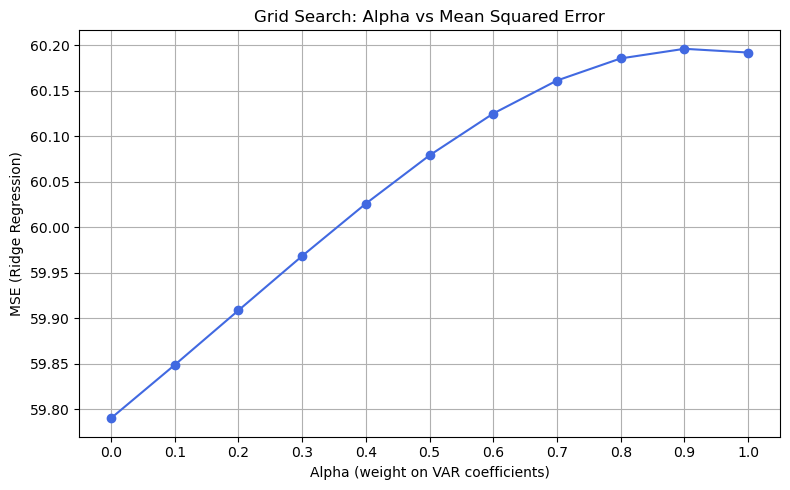

In [57]:
# ----------------------
# STEP 5: Plot Results
# ----------------------
plt.figure(figsize=(8, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='royalblue')
plt.title("Grid Search: Alpha vs Mean Squared Error")
plt.xlabel("Alpha (weight on VAR coefficients)")
plt.ylabel("MSE (Ridge Regression)")
plt.grid(True)
plt.xticks(alphas)
plt.tight_layout()
plt.show()

In [59]:
# Inside your loop over states
coef_vec = result.coefs.flatten()
ir_8 = irf.orth_irfs[8].flatten()
feature_vec = np.concatenate([coef_vec, ir_8])

X_all = regression_df.drop(columns=["State", "STLFSI4", "VIX", "VVIX", "EPU"])
split_idx = 4  # because now you have 4 VAR + 4 IRF(8)

X_coef = X_all.iloc[:, :split_idx].copy()
X_irf = X_all.iloc[:, split_idx:].copy()

# Standardize
X_coef_scaled = StandardScaler().fit_transform(X_coef)
X_irf_scaled = StandardScaler().fit_transform(X_irf)

# Alpha blending loop
alphas = np.round(np.arange(0.0, 1.1, 0.1), 2)
results = {}

for alpha in alphas:
    X_combined = np.concatenate([
        alpha * X_coef_scaled,
        (1 - alpha) * X_irf_scaled
    ], axis=1)

    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=10).fit(X_combined, y)
    preds = model.predict(X_combined)
    mse = mean_squared_error(y, preds)
    results[alpha] = mse

optimal_alpha = min(results, key=results.get)
print(f"✅ Optimal alpha (IRF-8 only): {optimal_alpha}")



✅ Optimal alpha (IRF-8 only): 0.0


## Aplha Grid Setup

In [60]:
# Define candidate alphas
alphas = np.round(np.arange(0.0, 1.1, 0.1), 2)

# Store alpha to MSE map
alpha_mse_scores = {}


### Dynamic Feature Blending

In [62]:
def blend_features(alpha, X_coef_scaled, X_irf_scaled):
    # Weighted stacking of coefficient + IRF features
    X_blended = np.concatenate([
        alpha * X_coef_scaled,
        (1 - alpha) * X_irf_scaled
    ], axis=1)
    return X_blended


### KNN

In [63]:
from sklearn.neighbors import NearestNeighbors

def get_knn_matches(X, state_names, treated_states, k=5):
    matches = {}
    knn = NearestNeighbors(n_neighbors=k+1, metric='euclidean')
    knn.fit(X)

    for state in treated_states:
        idx = np.where(state_names == state)[0][0]
        dists, indices = knn.kneighbors([X[idx]])
        neighbors = [state_names[i] for i in indices[0] if state_names[i] != state]
        matches[state] = neighbors[:k]
    
    return matches
